# Chunker Playground

Visualize and verify chunk quality from the `DocumentChunker`.

In [1]:
import sys
sys.path.insert(0, '../src')

from ingestion.chunker import DocumentChunker

In [2]:
# Load the parsed document
with open('../data/test_outputs/output.md', 'r', encoding='utf-8') as f:
    text = f.read()

print(f'Document length: {len(text):,} characters')

Document length: 161,766 characters


In [3]:
# Initialize chunker and process document
chunker = DocumentChunker()
chunks = chunker.chunk(text)

print(f'Total chunks: {len(chunks)}')
print(f'Average tokens per chunk: {sum(c.token_count for c in chunks) // len(chunks)}')
print(f'Min tokens: {min(c.token_count for c in chunks)}')
print(f'Max tokens: {max(c.token_count for c in chunks)}')

Total chunks: 225
Average tokens per chunk: 173
Min tokens: 27
Max tokens: 890


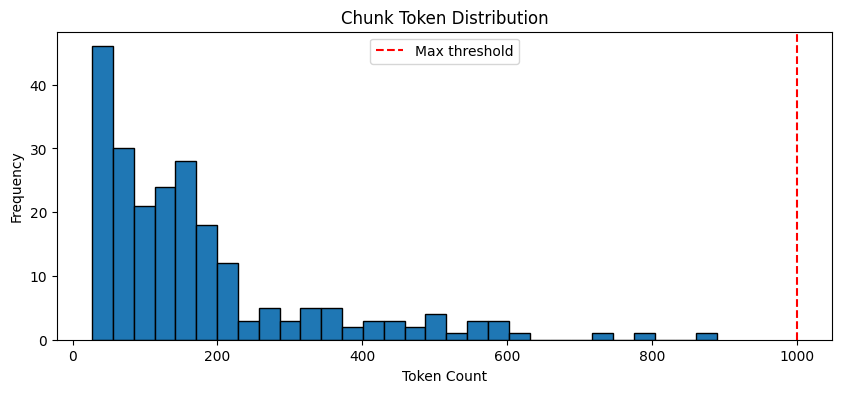

In [4]:
# Token distribution histogram
import matplotlib.pyplot as plt

token_counts = [c.token_count for c in chunks]
plt.figure(figsize=(10, 4))
plt.hist(token_counts, bins=30, edgecolor='black')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Chunk Token Distribution')
plt.axvline(x=1000, color='red', linestyle='--', label='Max threshold')
plt.legend()
plt.show()

## Check for Orphan Chunks

Look for chunks that contain minimal content (potential orphans).

In [5]:
# Find potential orphan patterns
orphan_patterns = ['INITIAL', 'Landlord Tenant', 'Page', 'MR –']
potential_orphans = []

for i, chunk in enumerate(chunks):
    content = chunk.content.strip()
    # Check for very short chunks or chunks matching orphan patterns
    if chunk.token_count < 20:
        potential_orphans.append((i, chunk.token_count, content[:100]))
    elif any(pattern in content and len(content) < 100 for pattern in orphan_patterns):
        potential_orphans.append((i, chunk.token_count, content[:100]))

if potential_orphans:
    print(f'⚠️ Found {len(potential_orphans)} potential orphan chunks:\n')
    for idx, tokens, preview in potential_orphans:
        print(f'  [{idx}] {tokens} tokens: "{preview}..."')
else:
    print('✅ No orphan chunks detected!')

✅ No orphan chunks detected!


## Sample Chunks

View sample chunks to verify coherent content.

In [6]:
# Display first 10 chunks
for i, chunk in enumerate(chunks[:50]):
    print(f'\n{"="*60}')
    print(f'CHUNK {i+1} | Tokens: {chunk.token_count} | Metadata: {chunk.metadata}')
    print('='*60)
    print(chunk.content[:500] + ('...' if len(chunk.content) > 500 else ''))


CHUNK 1 | Tokens: 42 | Metadata: {}
LEASE
BETWEEN:
PLATFORM PROPERTIES (MAPLE RIDGE) LTD.
(Landlord)
AND:
1256325 B.C. LTD.
(Tenant)
AND:
Harpreet Bahia &#x26; Jatinder Badyal
(collectively, the Indemnifier)

CHUNK 2 | Tokens: 68 | Metadata: {'article': 'ARTICLE 1 INTERPRETATION'}
# ARTICLE 1 INTERPRETATION
1.01     Basic Terms.                                                            1
1.02     Definitions.                                                            2
1.03     Schedules.                                                              8

CHUNK 3 | Tokens: 131 | Metadata: {'article': 'ARTICLE 2 DEMISE AND TERM'}
# ARTICLE 2 DEMISE AND TERM
2.01     Demise.                                                                 8
2.02     Survey of Rentable Area.                                                8
2.03     Term.                                                                   9
2.04     Acceptance of Premises.                                                 9
2.05 

In [ ]:
# View a specific chunk by index
chunk_idx = 50  # Change this to view different chunks
if chunk_idx < len(chunks):
    chunk = chunks[chunk_idx]
    print(f'CHUNK {chunk_idx + 1}')
    print(f'Tokens: {chunk.token_count}')
    print(f'Metadata: {chunk.metadata}')
    print('-' * 40)
    print(chunk.content)